# Convolutional Neural Networks for Sign Languag
If you are not familiar with nueral network, I suggest you to read this tutorial:

https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

## Introduction:

### Basic reminder:

** What is Neural Network**

The simplest definition of a neural network, more properly referred to as an 'artificial' neural network (ANN), is provided by the inventor of one of the first neurocomputers, Dr. Robert Hecht-Nielsen. He defines a neural network as:

"...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."

** The Basics of Neural Networks** 

Neural neworks, shown in Fig1, are typically organized in layers. Layers are made up of a number of interconnected 'nodes' which contain an 'activation function'. Patterns are presented to the network via the 'input layer', which communicates to one or more 'hidden layers' where the actual processing is done via a system of weighted 'connections'. The hidden layers then link to an 'output layer' where the Most ANNs contain some form of 'learning rule' which modifies the weights of the connections according to the input patterns that it is presented with. In a sense, ANNs learn by example as do their biological counterparts; a child learns to recognize dogs from examples of dogs [1].



Fig.1: https://medium.com/@curiousily/tensorflow-for-hackers-part-iv-neural-network-from-scratch-1a4f504dfa8

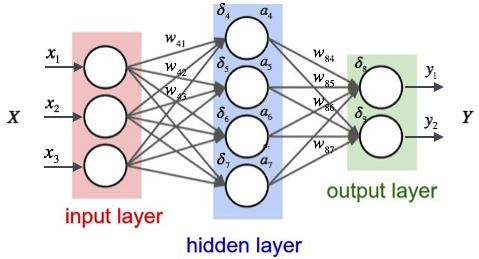

In [1]:
from IPython.display import Image
Image('./data/1-QVIyc5HnGDWTNX3m-nIm9w.png')

A neural network is basically a sequence of operations applied to a matrix of input data. These operations are usually collections of additions and multiplications followed by applications of non-linear functions. The important trick with neural networks is called **backpropagation**. Back propagation is a
procedure that allows us to update the model variables based on the learning rate and the output of the loss function. 

Backpropagation, short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. It is a generalization of the delta rule for perceptrons to multilayer feedforward neural networks. The "backwards" part of the name stems from the fact that calculation of the gradient proceeds backwards through the network, with the gradient of the final layer of weights being calculated first and the gradient of the first layer of weights being calculated last. Partial computations of the gradient from one layer are reused in the computation of the gradient for the previous layer. This backwards flow of the error information allows for efficient computation of the gradient at each layer versus the naive approach of calculating the gradient of each layer separately [2].

Another important feature to take note of in neural networks is **the non-linear activation function**. Since most neural networks are just combinations of addition and multiplication operations, they will not be able to model non-linear datasets. To address this issue, we have used the non-linear activation functions in the neural networks. This will allow the neural network to adapt to most non-linear situations.

Fig2:

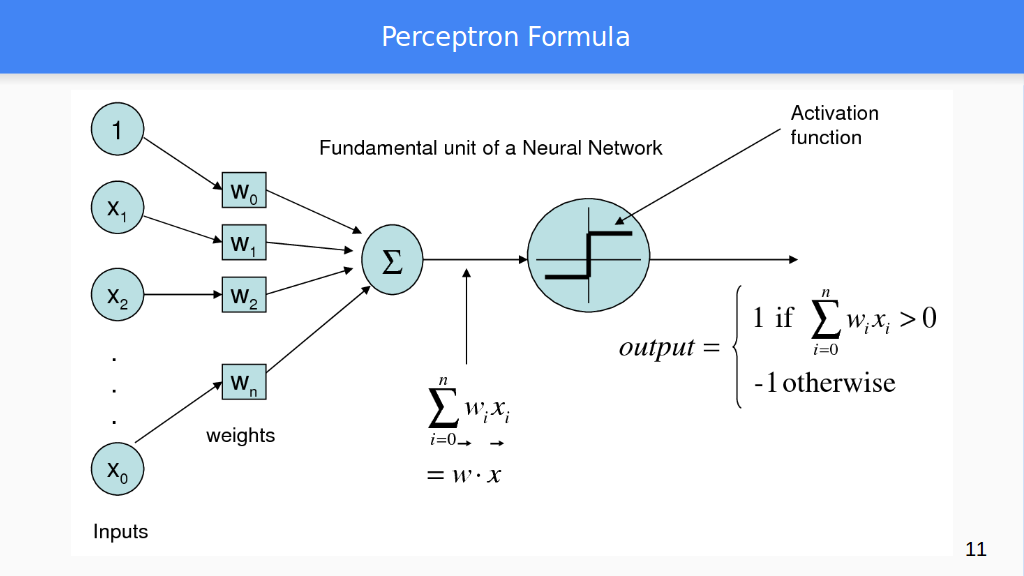

In [2]:
Image('./data/img10.png')

different types of activation:

Fig3:

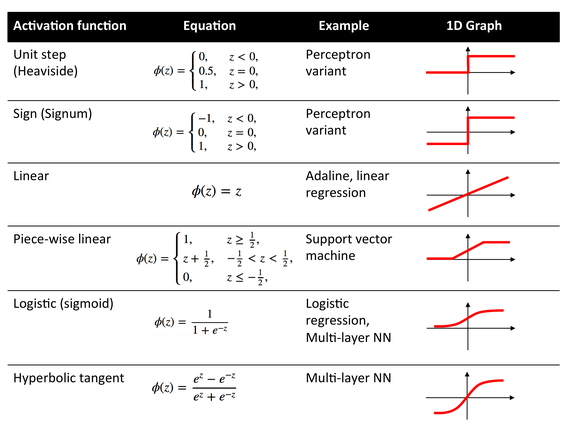

In [3]:
Image('./data/activation_functions.png')

** Optimization Algorithm **

The **Adam optimization** algorithm is an extension to stochastic gradient descent. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“. 

- How Does Adam Work?

Adam is different to classical stochastic gradient descent.Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.


The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

- **Adaptive Gradient Algorithm (AdaGrad)** that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

- **Root Mean Square Propagation (RMSProp)** that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates towards zero. This bias is overcome by first calculating the biased estimates before then calculating bias-corrected estimates [3]. More details [4,5].


## Convolutional Neural Networks

** What does Convolution mean? **

In mathematics, a convolution is a function which is applied over the output of another function. In our case, we will consider applying a matrix multiplication (filter/Kernel) across an image [6]. In deep learning, cross-correlation is called convolution although convultion operation in math the is a little different from cross-correlation [7]. 

Fig.4: https://stats.stackexchange.com/questions/114385/what-is-the-difference-between-convolutional-neural-networks-restricted-boltzma

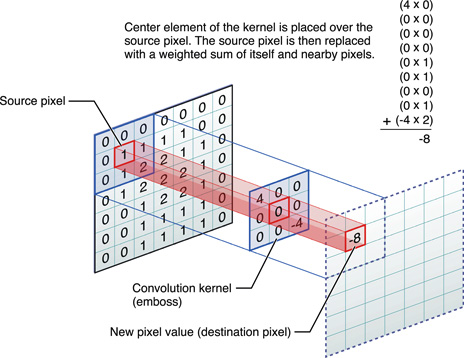

In [4]:
Image('./data/GvsBA.jpg')

** Convolutional Neural Networks **

Convolutional Neural Networks (CNNs) are are a special kind of multi-layer neural networks. They are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer. However, ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network [8]. Therefore, they can recognize patterns with extreme variability (such as handwritten characters), and with robustness to distortions and simple geometric transformations [9]. CNNs have various architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and etc. Here, LENET-5 one of the simplest architectures is considered to make a prediction the sign languge. 

Before studying LeNet, we need to learn another concept which is called pooling.  

** Stride and Padding **

Stride controls how the filter convolves around the input volume. The filter convolves around the input volume by shifting one/two, .. unit at a time.  Stride is normally set in a way so that the output volume is an integer and not a fraction. Let’s look at an example. Let’s imagine a 7 x 7 input volume, a 3 x 3 filter (Disregard the 3rd dimension for simplicity), and a stride of 2. So, as you can see, the receptive field is shifting by 2 units now and the output volume shrinks as well. Notice that if we tried to set our stride to 3, then we’d have issues with spacing and making sure the receptive fields fit on the input volume. Normally, programmers will increase the stride if they want receptive fields to overlap less and if they want smaller spatial dimensions.

Fig 5: https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

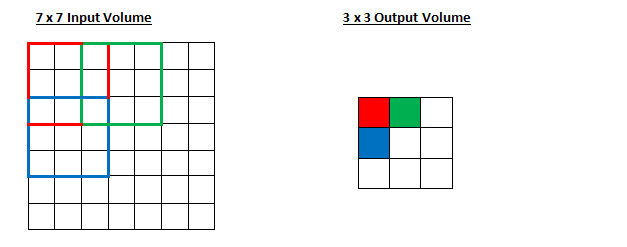

In [5]:
Image('./data/Stride2.png')

** Padding **

What happens when you apply three 5 x 5 x 3 filters to a 32 x 32 x 3 input volume? The output volume would be 28 x 28 x 3. Notice that the spatial dimensions decrease. As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features. Let’s say we want to apply the same conv layer but we want the output volume to remain 32 x 32 x 3. To do this, we can apply a zero padding of size 2 to that layer. Zero padding pads the input volume with zeros around the border. If we think about a zero padding of two, then this would result in a 36 x 36 x 3 input volume.

Fig. 6:

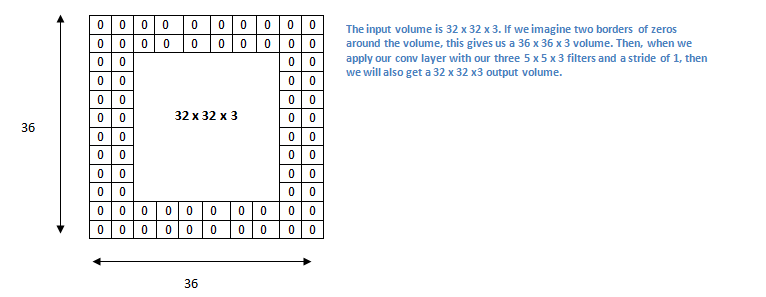

In [6]:
Image('./data/Pad.png')

** Pooling? **

It is also referred to as a downsampling layer. In this category, there are also several layer options, with maxpooling being the most popular. This basically takes a filter (normally of size 2x2) and a stride of the same length. It then applies it to the input volume and outputs the maximum number in every subregion that the filter convolves around.

Fig. 7 : https://en.wikipedia.org/wiki/Convolutional_neural_network

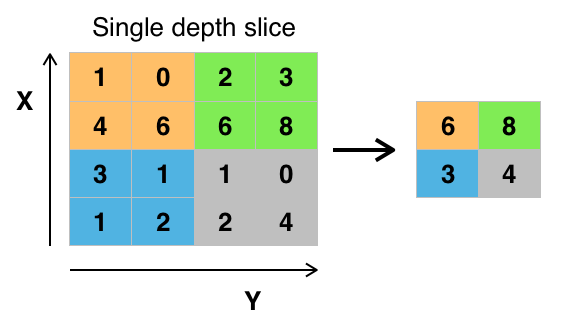

In [7]:
Image('./data/Max_pooling.png')

** Input and Output size**

The formula for calculating the output size for any given conv layer is

input----------filter-------------------output

n $\times$ n----*----f $\times$ f --------$[\frac{n+2p-f}{s} + 1] \times [\frac{n+2p-f}{s} + 1]$ 

where n is input size for example $32 \times 32 \times 1$, $p$ is padding, $f$ number of filters and $s$ is stride


**LeNet-5 (1998)**:

LeNet-5, a pioneering 7-level convolutional network by LeCun et al in 1998, that classifies digits, was applied by several banks to recognise hand-written numbers on checks (cheques) digitized in 32x32 pixel images. The ability to process higher resolution images requires larger and more convolutional layers, so this technique is constrained by the availability of computing resources [10]. For example, leNet-5 Start with an image of 32 x 32 x 1 and goal was to recognize handwritten digit. In the first step we use six 5 x 5 filter with stride 1 and get 28 x 28 x 6. With stride of 1 and no padding we reduce the dimension to 32 x 32 to 28 x 28. Then we use a average pooling with a filter width of 2 and stride of 2 and reduce the dimension by factor of 2 and end up with 14 x 14 x 6. Then we use another convolutional layer with sixteen 5 x 5 filter and end up with 10 x 10 x 16. That time people use valid padding that’s why each time height and weight shrinks. Then another pooling layer and end up with 5 x 5 x 16. Then the next layer is a fully connected layer with 120 nodes. The previous layers 400 (5*5*16) then connected with this 120 neurons. Then another layer this 120 nodes connected with a 84 node and use this to connected with Yhat with possible 10 values that will recognize digit from 0 to 9. But in modern version of this neural net we use softmax function with a ten wave classification output [11].

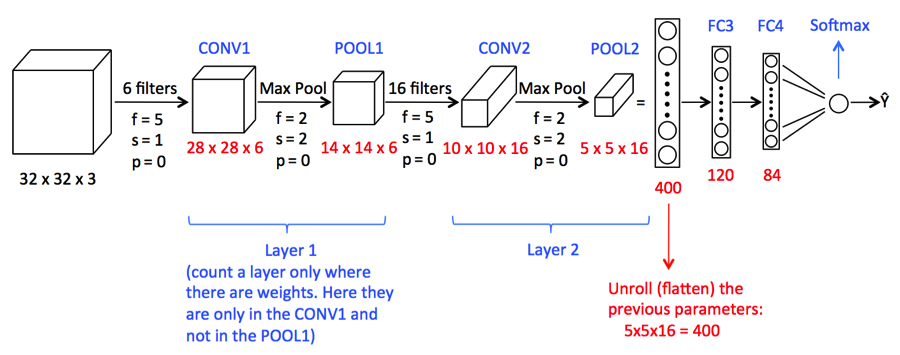

In [8]:
Image('./data/1-_l-0PeSh3oL2Wc2ri2sVWA.png')

## Overview the Data Set:

- Image size: 64x64
- Color space: Grayscale
- File format: npy
- Number of classes: 10 (Digits: 0-9)
- Number of participant students: 218
- Number of samples per student: 10

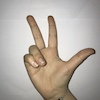

In [9]:
Image('./data/example_3.JPG')

### Imports

In [2]:
import tensorflow as tf

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
# import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

from sklearn.model_selection import train_test_split

In [3]:
import glob
import os
import math
import operator
import functools
import random
import datetime
from scipy.ndimage.interpolation import rotate, shift, zoom

## Load Data

In [4]:
# load data set
all_X = np.load('./data/X.npy')
all_Y = np.load('./data/Y.npy')

In [5]:
# Train Test split
test_size = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(all_X, all_Y, test_size=test_size, random_state=42)

In [6]:
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size grayscale image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size grayscale image.\n')

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



In [7]:
# Train and test classification between 0-10
Y_test_cls = np.argmax(Y_test, axis=1)
Y_train_cls = np.argmax(Y_train, axis=1)

## Data Dimensions
The data dimensions are used in several places in the source-code below. They are defined once so we can use these variables instead of numbers throughout the source-code below

In [8]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 64

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

## Plot Images
Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

** Plot a few images to see if data is correct **

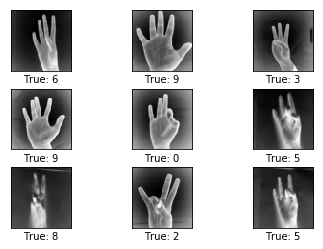

In [10]:
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = Y_test_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## Data prepration

In [11]:
train_X = X_train
train_Y = Y_train
new_train_X = train_X.reshape(X_train.shape[0],img_size_flat)
new_test_X = X_test.reshape(X_test.shape[0],img_size_flat)

In [12]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=new_train_X.shape))
print("Training set (labels) shape: {shape}".format(shape=train_Y .shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=new_test_X.shape))
print("Test set (labels) shape: {shape}".format(shape=Y_test.shape))


Training set (images) shape: (1752, 4096)
Training set (labels) shape: (1752, 10)
Test set (images) shape: (310, 4096)
Test set (labels) shape: (310, 10)


## Configuration of Neural Network
The configuration of the Convolutional Neural Network is defined here for convenience, so you can easily find and change these numbers and re-run the Notebook.

In [22]:
# architecture hyper-parameter
learning_rate = 0.001
training_iters = 40000
batch_size = 16
display_step = 20

n_input = img_size_flat # 64x64 image
# num_classes = 10 # 1 for each digit [0-9]
dropout = 0.75 

## TensorFlow Graph

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

A TensorFlow graph consists of the following parts which will be detailed below:
- Placeholder variables used for inputting data to the graph.
- Variables that are going to be optimized so as to make the convolutional network perform better.
- The mathematical formulas for the convolutional network.
- A cost measure that can be used to guide the optimization of the variables.
- An optimization method which updates the variable

## Placeholder variables
Placeholder variables serve as the input to the TensorFlow computational graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.
First we define the placeholder variable for the input images. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. 

## Making Model:

In [23]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)
print(x.shape, y.shape)

(?, 4096) (?, 10)


**SAME padding** sometimes called **HALF padding**. It is called SAME because for a convolution with a stride=1, (or for pooling) it should produce output of the same size as the input. It is

$p = [k/2]$
called HALF because for a kernel of size k [12].


In [24]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [25]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [26]:
def conv_net(x, weights, biases, dropout):
    # reshape input to 64x64 size
    x = tf.reshape(x, shape=[-1, 64, 64, 1])
    

    # Convolution layer 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling
    conv1 = maxpool2d(conv1, k=2)

    # Convolution layer 2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max pooling
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1) # layer
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [27]:
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]),name='wc1'),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64]),name='wc2'),
    'wd1': tf.Variable(tf.random_normal([64 * 64 * 4, 1024]),name='wd1'),
    'out': tf.Variable(tf.random_normal([1024, num_classes]),name='wout')
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32]),name='bc1'),
    'bc2': tf.Variable(tf.random_normal([64]),name='bc2'),
    'bd1': tf.Variable(tf.random_normal([1024]),name='bd1'),
    'out': tf.Variable(tf.random_normal([num_classes]),name='bout')
}

**Optimization Method**

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the AdamOptimizer which is an advanced form of Gradient Descent.

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

**Performance Measures **
We need a few more performance measures to display the progress to the user.

In [28]:
# Create the model
model = conv_net(x, weights, biases, keep_prob)
print(model)
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
y_true_cls =  tf.argmax(y, 1)
y_pred_cls = tf.argmax(model, 1)
# This is a vector of booleans whether the predicted 
#class equals the true class of each image.
correct_model = tf.equal(y_pred_cls,y_true_cls)
# This calculates the classification accuracy by first type-casting 
#the vector of booleans to floats, so that False becomes 0 and True becomes 1,
#and then calculating the average of these numbers.

# correct_model = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_model, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

Tensor("Add_1:0", shape=(?, 10), dtype=float32)


** Get Batch**

Get Batch: defines number of samples that going to be propagated through the network.
Batch Size : Total number of training examples present in a single batch.
We can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.

** Iterations**

Iterations is the number of batches needed to complete one epoch. The number of batches is equal to number of iterations for one epoch.

In [29]:
def getBatch(X, Y, batchSize=16):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input train/test 
    Y --input label train/test
    
    Returns:
    mini_batches -- tuple of synchronous (mini_batch_X, mini_batch_Y)
    
    """
    arrayLength = X.shape[0]
    count = 0 
    
    while count < arrayLength/batchSize:
        random.seed(datetime.datetime.now())
        randstart = random.randint(0, arrayLength-batchSize-1)
#         print(randstart)
        count += 1
        yield (X[randstart:randstart+batchSize], Y[randstart:randstart+batchSize]) 


In [30]:
loss_t = []
steps_t = []
acc_t = []
# saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1   
#     Keep training until reach max iterations
    while step * batch_size < training_iters:
        a = getBatch(new_train_X,train_Y, batch_size)
        batch_x, batch_y = next(a)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        if step % display_step == 0:
            print('*'*15)
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Loss= " + \
                  "{:.3f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            loss_t.append(loss)
            steps_t.append(step*batch_size)
            acc_t.append(acc)
        step += 1
    
   #
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: new_test_X,
                                      y: Y_test,
                                      keep_prob: 1.}))
    
    cls_pred = sess.run(y_pred_cls, feed_dict={x: new_test_X,
                                      y: Y_test,
                                      keep_prob: 1.})
#     print(cls_pred)
#     saver.save(sess, 'my_model')

***************
Iter 320, Loss= 58133.438, Training Accuracy= 0.188
***************
Iter 640, Loss= 40157.082, Training Accuracy= 0.125
***************
Iter 960, Loss= 18549.637, Training Accuracy= 0.375
***************
Iter 1280, Loss= 24392.941, Training Accuracy= 0.250
***************
Iter 1600, Loss= 1962.828, Training Accuracy= 0.750
***************
Iter 1920, Loss= 9016.782, Training Accuracy= 0.562
***************
Iter 2240, Loss= 10107.297, Training Accuracy= 0.312
***************
Iter 2560, Loss= 4769.081, Training Accuracy= 0.688
***************
Iter 2880, Loss= 3717.978, Training Accuracy= 0.562
***************
Iter 3200, Loss= 3380.327, Training Accuracy= 0.750
***************
Iter 3520, Loss= 6371.614, Training Accuracy= 0.375
***************
Iter 3840, Loss= 1335.067, Training Accuracy= 0.812
***************
Iter 4160, Loss= 2097.067, Training Accuracy= 0.688
***************
Iter 4480, Loss= 1994.084, Training Accuracy= 0.875
***************
Iter 4800, Loss= 176.318, Trai

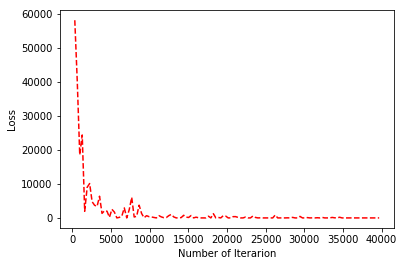

In [31]:
plt.plot(steps_t, loss_t, 'r--')
plt.xlabel("Number of Iterarion")
plt.ylabel("Loss")
plt.show()

Train accuracy:

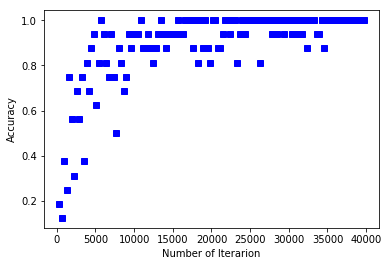

In [32]:
plt.plot(steps_t, acc_t,'bs')
plt.title("Train Acuracy")
plt.xlabel("Number of Iterarion")
plt.ylabel("Train Accuracy")
plt.show()

In [33]:
# Create a boolean array whether each image is correctly classified.
correct = (Y_test_cls == cls_pred)

In [34]:
# Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
correct_sum = correct.sum()
num_test = X_test.shape[0]
# Classification accuracy is the number of correctly classified
# images divided by the total number of images in the test-set.
acc = float(correct_sum) / num_test

In [35]:
# Print the accuracy.
msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
print(msg.format(acc, correct_sum, num_test))

Accuracy on Test-Set: 83.2% (258 / 310)


### Plot misclassification

In [36]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images =new_test_X[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = Y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

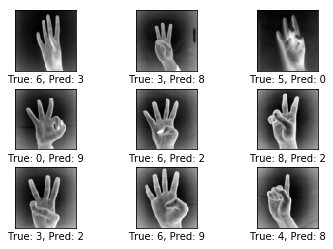

In [37]:
plot_example_errors(cls_pred=cls_pred, correct=correct)

In [38]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = Y_test_cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

[[21  0  0  0  0  3  1  0  0  2]
 [ 0 30  0  1  1  0  0  0  0  0]
 [ 0  0 32  1  0  4  1  0  4  0]
 [ 0  0  1 23  0  0  3  0  1  0]
 [ 0  0  0  0 19  2  0  0  3  0]
 [ 1  0  3  0  0 24  0  0  0  0]
 [ 1  0  6  2  0  1 15  0  2  3]
 [ 0  0  0  0  0  0  0 29  0  1]
 [ 0  0  1  2  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  1  0  0 34]]


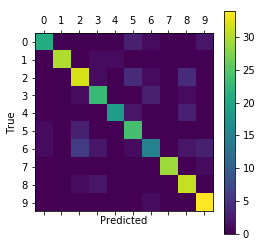

In [39]:
plot_confusion_matrix(cls_pred=cls_pred)

**Conclusion**

We could predict the sign language for 1 to 10 by the accuracy 83% of by apply LeNet CNN. Although we can improve the accuracy by increasing the iteration, I will not increase the interation becasue of hardware limitation.


**References**

[1] http://pages.cs.wisc.edu/~bolo/shipyard/neural/local.html#

[2] https://brilliant.org/wiki/backpropagation/

[3] https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

[4] https://www.coursera.org/learn/deep-neural-network/lecture/w9VCZ/adam-optimization-algorithm

[5] http://ruder.io/optimizing-gradient-descent/

[6] Tensorflow Machine Learning CookBook

[7] Deepleaning.ai Andrew NG (cross-corralation vs. convolution)

[8] http://cs231n.github.io/convolutional-networks/

[9] http://yann.lecun.com/exdb/lenet/

[10] https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

[11] https://medium.com/@shahariarrabby/lenet-5-alexnet-vgg-16-from-deeplearning-ai-2a4fa5f26344

[12] https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

